# Drop BMI Column

# Importing the Libraries and Loading the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from scipy.stats import stats
from sklearn import linear_model
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv('dataset.csv') 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Drop column with missing values.

In [4]:
df1 = df.copy(deep=True)
df1= df.dropna(axis=1) 

H επιλογή του άξονα axis = 1 στην εντολή dropna μας επιτρέπει να αφαιρέσουμε όλες τις στήλες που εντοπίζεται NaN τιμή , στην προκειμένη περίπτωση αφαιρείται η στήλη bmi.

In [5]:
print("Missing Values per Column:")
df1.isnull().sum()

Missing Values per Column:


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

# Μετατροπή των Categorical Features σε Numerical Values

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_type_columns = df1.select_dtypes(include='object')
    
for title in object_type_columns:
     df1[title] = le.fit_transform(df1[title])
df1.tail()

<ipython-input-6-b02bcb5c9091>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[title] = le.fit_transform(df1[title])


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
5105,18234,0,80.0,1,0,1,2,1,83.75,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,1,0
5109,44679,0,44.0,0,0,1,0,1,85.28,0,0


# Scaling των αριθμητικών τιμών 

In [7]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df1[['age','work_type','avg_glucose_level','smoking_status']]=min_max_scaler.fit_transform(df1[['age','work_type','avg_glucose_level','smoking_status']])
df1.tail()

<ipython-input-7-0beb908e74e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['age','work_type','avg_glucose_level','smoking_status']]=min_max_scaler.fit_transform(df1[['age','work_type','avg_glucose_level','smoking_status']])
c:\users\charalampos\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
5105,18234,0,0.975586,1,0,1,0.50,1,0.132167,0.666667,0
5106,44873,0,0.987793,0,0,1,0.75,1,0.323516,0.666667,0
5107,19723,0,0.426270,0,0,1,0.75,0,0.128658,0.666667,0
5108,37544,1,0.621582,0,0,1,0.50,0,0.513203,0.333333,0
5109,44679,0,0.536133,0,0,1,0.00,1,0.139230,0.000000,0


# Random Forest Classification

In [8]:
RF_clf = RandomForestClassifier()
new_data = df1.copy(deep=True) #Δημιουργώ deep copy ώστε να μην κάνω αλλαγές στο αρχικό dataset.

In [9]:
X = new_data.drop(['id','stroke'], axis=1)
y = new_data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    

Χωρίζω το Dataset σε train kai test set με αναλογία 75-25 .

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.50      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.72      0.51      0.50      1278
weighted avg       0.91      0.94      0.91      1278



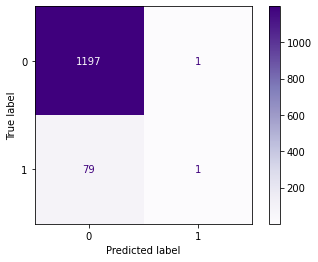

In [10]:
RF_clf.fit(X_train, y_train) 
RF_prediction = RF_clf.predict(X_test)
RF_prob = RF_clf.predict_proba(X_test)[:, 1]
RF_metrics = metrics.f1_score(y_test, RF_prediction).round(2)
RF_report = metrics.classification_report(y_test, RF_prediction)
metrics.plot_confusion_matrix(RF_clf, X_test, y_test, cmap='Purples')
plt.grid(False)
print(RF_report)

# Oversampling 

Βλέπουμε ότι το μοντέλο μας δεν ταξινομεί καλά τους 'άσσους' και μας δίνει καλά αποτελέσματα μόνο για τα 'μηδενικά'. Παρατηρώντας την ανάλυση του dataset θα δούμε ότι οι περιπτώσεις που έχουμε 'άσσο', δηλαδή τις περιπτώσεις που έχουμε 
εγκεφαλικό επεισόδιο είναι πολύ λίγες σε σχέση με τα 'μηδενικά'. Αυτό λύνεται χρησιμοποιώντας την μέθοδο του oversampling ώστε να τα φέρουμε σε μια ισορροπία.

In [11]:
sm = SMOTE(random_state=2) #Balance data by oversampling
x_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print("Πρίν το oversampling, πλήθος '1': {}".format(sum(y_train==1)))
print("Πρίν το OverSampling, πλήθος '0': {} \n".format(sum(y_train==0)))
print("Μετά το OverSampling, πλήθος '1': {}".format(sum(y_train_res==1)))
print("Μετά το OverSampling, πλήθος '0': {}".format(sum(y_train_res==0)))

Πρίν το oversampling, πλήθος '1': 169
Πρίν το OverSampling, πλήθος '0': 3663 

Μετά το OverSampling, πλήθος '1': 3663
Μετά το OverSampling, πλήθος '0': 3663


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1198
           1       0.19      0.15      0.17        80

    accuracy                           0.91      1278
   macro avg       0.57      0.55      0.56      1278
weighted avg       0.90      0.91      0.90      1278



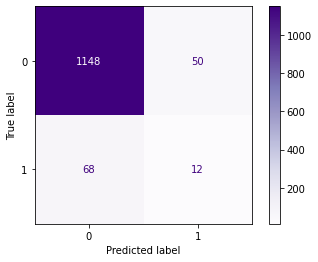

In [12]:
RF_clf.fit(x_train_res, y_train_res) 
RF_prediction = RF_clf.predict(X_test)
RF_prob = RF_clf.predict_proba(X_test)[:, 1]
RF_metrics = metrics.f1_score(y_test, RF_prediction).round(2)
RF_report = metrics.classification_report(y_test, RF_prediction)
metrics.plot_confusion_matrix(RF_clf, X_test, y_test, cmap='Purples')
plt.grid(False)
print(RF_report)